# Base model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


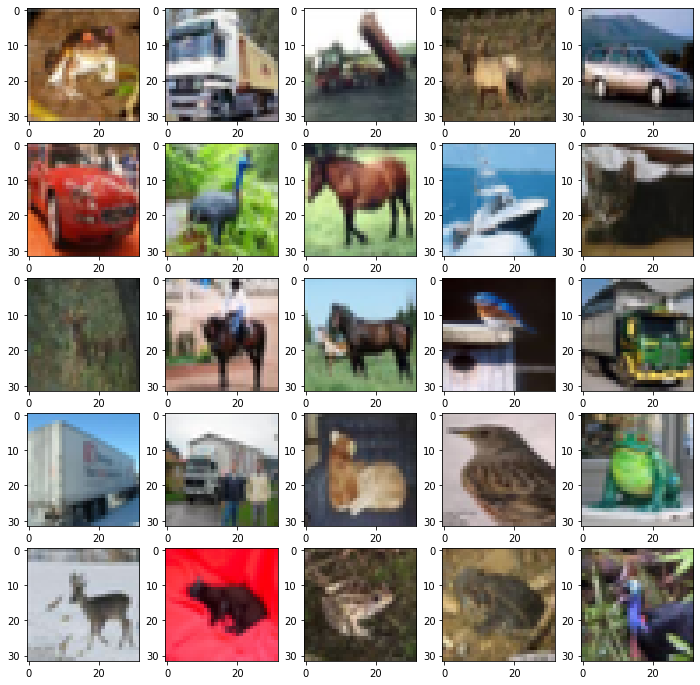

In [3]:
plt.figure(figsize = (12, 12))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.imshow(x_train[i])

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
x_train.shape, x_test.shape, t_train.shape, t_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [24]:
import os, random

def reset_seed(seed = 0):
  os.environ['PYTHONHASHSEED'] = '0'
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)

In [25]:
from tensorflow.keras import models, layers

In [27]:
reset_seed(0)

model = models.Sequential([
                           layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Flatten(),
                           layers.Dense(128, activation = 'relu'),
                           layers.Dense(10, activation = 'softmax')
])

optimizer = tf.keras.optimizers.Adam(lr = 1e-3)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [28]:
batch_size = 1024
epochs = 50

history = model.fit(x_train, t_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, t_test))

Epoch 1/50
49/49 [==============================] - 36s 63ms/step - loss: 2.1070 - accuracy: 0.2203 - val_loss: 1.6641 - val_accuracy: 0.4049
Epoch 2/50
49/49 [==============================] - 2s 41ms/step - loss: 1.6084 - accuracy: 0.4285 - val_loss: 1.4286 - val_accuracy: 0.4915
Epoch 3/50
49/49 [==============================] - 2s 42ms/step - loss: 1.4170 - accuracy: 0.4957 - val_loss: 1.3451 - val_accuracy: 0.5254
Epoch 4/50
49/49 [==============================] - 2s 41ms/step - loss: 1.3100 - accuracy: 0.5385 - val_loss: 1.2236 - val_accuracy: 0.5652
Epoch 5/50
49/49 [==============================] - 2s 42ms/step - loss: 1.1979 - accuracy: 0.5775 - val_loss: 1.1581 - val_accuracy: 0.5883
Epoch 6/50
49/49 [==============================] - 2s 42ms/step - loss: 1.1361 - accuracy: 0.6039 - val_loss: 1.1305 - val_accuracy: 0.6016
Epoch 7/50
49/49 [==============================] - 2s 41ms/step - loss: 1.0708 - accuracy: 0.6257 - val_loss: 1.0882 - val_accuracy: 0.6201
Epoch 8/50
4

In [29]:
results = pd.DataFrame(history.history)

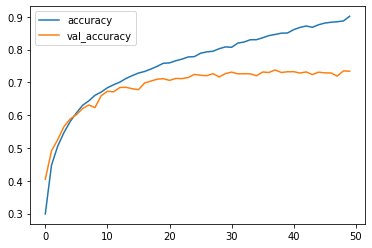

In [38]:
results[['accuracy', 'val_accuracy']].plot()

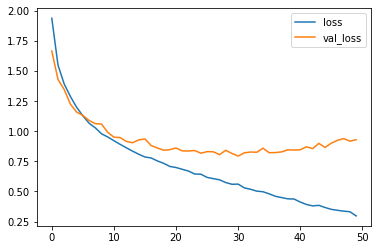

In [39]:
results[['loss', 'val_loss']].plot()

In [40]:
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
49,0.296698,0.90164,0.928607,0.734


# Dropout

In [41]:
reset_seed(0)

model = models.Sequential([
                           layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Flatten(),
                           layers.Dropout(0.5),
                           layers.Dense(128, activation = 'relu'),
                           layers.Dense(10, activation = 'softmax')
])

optimizer = tf.keras.optimizers.Adam(lr = 1e-3)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [43]:
batch_size = 1024
epochs = 50

history = model.fit(x_train, t_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, t_test))

Epoch 1/50
49/49 [==============================] - 3s 48ms/step - loss: 2.1145 - accuracy: 0.2131 - val_loss: 1.6495 - val_accuracy: 0.4083
Epoch 2/50
49/49 [==============================] - 2s 42ms/step - loss: 1.6178 - accuracy: 0.4161 - val_loss: 1.4257 - val_accuracy: 0.4898
Epoch 3/50
49/49 [==============================] - 2s 42ms/step - loss: 1.4331 - accuracy: 0.4828 - val_loss: 1.3157 - val_accuracy: 0.5308
Epoch 4/50
49/49 [==============================] - 2s 42ms/step - loss: 1.3444 - accuracy: 0.5175 - val_loss: 1.2127 - val_accuracy: 0.5716
Epoch 5/50
49/49 [==============================] - 2s 42ms/step - loss: 1.2330 - accuracy: 0.5602 - val_loss: 1.1302 - val_accuracy: 0.6040
Epoch 6/50
49/49 [==============================] - 2s 42ms/step - loss: 1.1657 - accuracy: 0.5853 - val_loss: 1.1261 - val_accuracy: 0.6031
Epoch 7/50
49/49 [==============================] - 2s 42ms/step - loss: 1.1183 - accuracy: 0.6040 - val_loss: 1.0454 - val_accuracy: 0.6381
Epoch 8/50
49

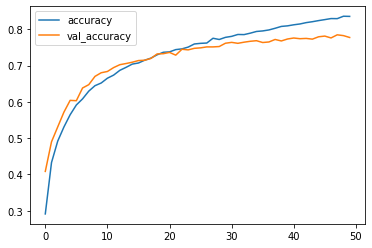

In [44]:
results = pd.DataFrame(history.history)
results[['accuracy', 'val_accuracy']].plot()

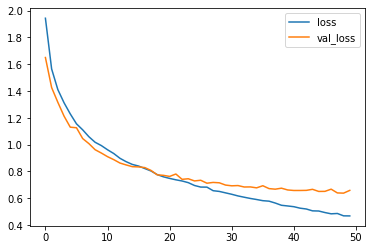

In [45]:
results[['loss', 'val_loss']].plot()

In [47]:
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
49,0.468811,0.83538,0.659049,0.7773


# Regularization